<a href="https://colab.research.google.com/github/anushayarramsetti/FMMLLAB1/blob/main/FMML_Module_9_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 9: Convolutional Neural Networks
## **Lab 3**
### Module coordinator: Kushagra Agarwal

## 1. Understanding Convolutions

<img src="https://miro.medium.com/max/464/0*e-SMFTzO8r7skkpc" width=650px/>

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Importing some pytorch packages
import torch
from torch.nn import Conv2d

Central to CNNs, a convolution operation is a linear element-wise multiplication operation between a small filter/kernel and same-sized patch from the image. We move this filter over the image like a sliding window from top left to bottom right. For each point on the image, a value is calculated based on the filter using a convolution operation. These filters can do simplest task like checking if there is a vertical line in the image or complicated task like detecting a human eye in the image.

Let's look at the convolution formula:

Convolution between image
$f(x, y)$ and kernel $k(x, y)$ is
$$f(x,y) * k(x,y) = \sum \limits _{i=0} ^{W-1} \sum \limits _{j=0} ^{H-1} f(i, j) k(x − i, y − j)$$

where $W$ and $H$ are the the width and height of the image.

The code demonstrates the convolution operation of a 2D matrix (image) with various filters

<img src="https://www.researchgate.net/profile/Chaim-Baskin/publication/318849314/figure/fig1/AS:614287726870532@1523469015098/Image-convolution-with-an-input-image-of-size-7-7-and-a-filter-kernel-of-size-3-3.png" alt="Convolution" width=650px height=280px/>

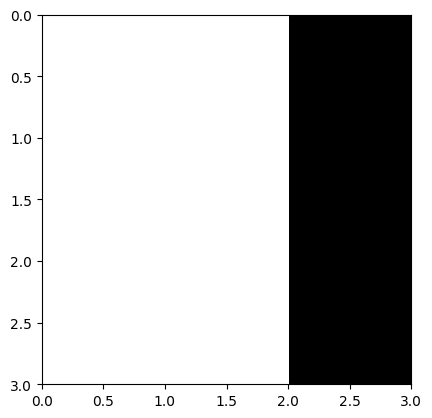

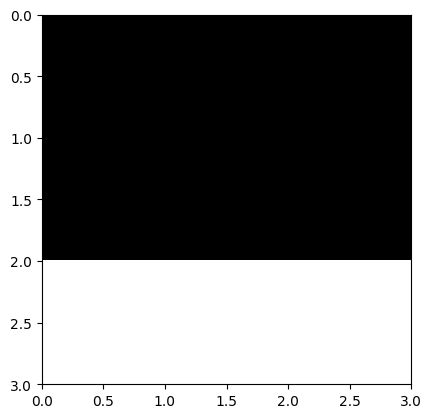

In [17]:
# 2D 3x3 binary image with vertical edge
image1 = np.array([[1,1,0], [1,1,0], [1,1,0]])

# 2D 3x3 binary image with horizontal edge
image2 = np.array([[0,0,0], [0,0,0], [1,1,1]])

# On plotting the images
plt.imshow(image1, cmap='gray', extent=[0, 3, 3, 0])
plt.show()
plt.imshow(image2, cmap='gray', extent=[0, 3, 3, 0])
plt.show()

In [18]:
# Vertical Line filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

# Applying filter to first image
output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

# Applying filter to second image
output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  3
Output from second image:  0


In [19]:
# Horizontal edge filter
filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  0
Output from second image:  3


Non-zero output suggests that there is a vertical edge present in the first image and not present in the second image. Similarly, horizontal edge is detected in second.

Let's define a function to use convolution layer from Pytorch and use our own kernel to detect edges in image

In [24]:
def apply_conv(image, kernel, padding=0, stride=1):

  #--------IMAGE PREPROCESSING-------
  image = torch.from_numpy(image)
  # Pytorch requires input to convolution in (N,C,H,W), where N = batch size and C=#channels in input
  input = image.view((1,1,image.shape[0], image.shape[1]))

  # --------------KERNEL-------------
  kernel = torch.from_numpy(kernel.astype(np.float32))

  # Pytorch requires kernel of shape (N,C,H,W), where N = batch size and C=#channels in input
  kernel = kernel.view((1,1,kernel.shape[0], kernel.shape[1]))

  # ---------CONVOLUTION LAYER from Pytorch--------
  conv = Conv2d(in_channels=1, out_channels=1, kernel_size=kernel.shape, padding=padding, stride=stride)

  # Set the kernel weights in the convolution layer
  conv.weight = torch.nn.Parameter(kernel)

  # ---------APPLY CONVOLUTION--------
  output = conv(input.float())
  output_img = output.data.numpy()  # Tensor to back in numpy
  output_img = output_img.reshape((-1, output_img.shape[-1])) # Reshape to 2D image

  return output_img

In [25]:
!gdown --id 16aZJNnbi447VjK_Fd7fF5xyXKvxFZtfW

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=16aZJNnbi447VjK_Fd7fF5xyXKvxFZtfW
To: /content/grid1.jpg
100% 7.99k/7.99k [00:00<00:00, 22.8MB/s]


In [29]:


# Our original lotus image
image = cv2.imread('grid1.jpg', 0)

filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

out1 = apply_conv(image, filter, padding=0, stride=1)

filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

out2 = apply_conv(image, filter, padding=0, stride=1)

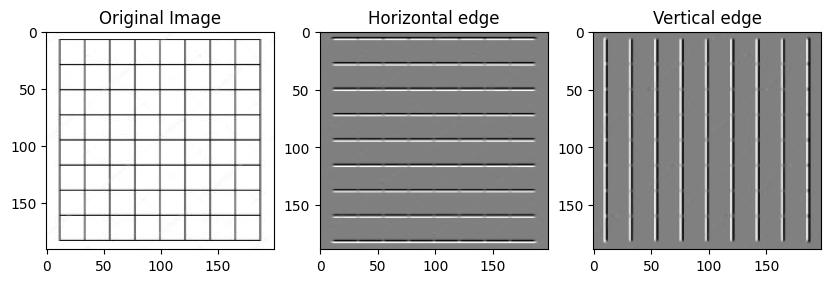

In [30]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,3,1)
ax.imshow(image, cmap='gray')
ax.set_title('Original Image')
ax = fig.add_subplot(1,3,2)
ax.set_title('Horizontal edge')
ax.imshow(out1, cmap='gray')
ax = fig.add_subplot(1,3,3)
ax.imshow(out2, cmap='gray')
ax.set_title('Vertical edge')
plt.show()

## Pooling Layers

Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network. The pooling layer summarises the features present in a region of the feature map generated by a convolution layer.

1) Max Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721025744/Screenshot-2019-07-21-at-2.57.13-AM.png' height=150px/>

2) Average Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721030705/Screenshot-2019-07-21-at-3.05.56-AM.png' height=150px/>

## Softmax layer/activation
Recall that logistic regression produces a decimal between 0 and 1.0. For example, a logistic regression output of 0.8 from an email classifier suggests an 80% chance of an email being spam and a 20% chance of it being not spam. Clearly, the sum of the probabilities of an email being either spam or not spam is 1.0.

Softmax extends this idea into a multi-class world. That is, Softmax assigns decimal probabilities to each class in a multi-class problem. Those decimal probabilities must add up to 1.0. This additional constraint helps training converge more quickly than it otherwise would.
Softmax is implemented through a neural network layer just before the output layer. The Softmax layer must have the same number of nodes as the output layer.

<img src='https://miro.medium.com/max/1400/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg' height=170px />

## Learning to train a CNN network

In [31]:
# Import packages
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [32]:
#  Images returned from torchvision dataset classes is in range [0,1]
# We transform them to tensors and normalize them to range [-1,1] using 'Normalize' transform

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Classes in CIFAR10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:10<00:00, 16108889.54it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [33]:
print('Training data shape : ', trainset.data.shape, len(trainset.targets))
print('Testing data shape : ', testset.data.shape, len(testset.targets))

# Find the unique numbers from the train labels
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (50000, 32, 32, 3) 50000
Testing data shape :  (10000, 32, 32, 3) 10000
Total number of outputs :  10
Output classes :  ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [34]:
def train(num_epochs, model, train_loader, loss_func, optimizer):

  # Training mode
  model.train()

  train_losses = []
  train_acc = []

  # Train the model
  for epoch in range(num_epochs):
    running_loss = 0
    running_acc = 0
    for i, (images, labels) in enumerate(train_loader):

      # clear gradients for this training step
      optimizer.zero_grad()

      # Forward pass
      output = model(images)

      # Calculate loss
      loss = loss_func(output, labels)

      # Backpropagation, compute gradients
      loss.backward()

      # Apply gradients
      optimizer.step()

      # Running loss
      running_loss += loss.item()

      # indices of max probabilities
      _, preds = torch.max(output, dim=1)

      # Calculate number of correct predictions
      correct = (preds.float() == labels).sum()
      running_acc += correct

      # Average loss and acc values
      epoch_loss = running_loss / len(train_loader.dataset)
      epoch_acc = running_acc / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)
    print ('Epoch {}/{}, Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch + 1, num_epochs, epoch_loss, epoch_acc*100))

  return train_losses, train_acc

In [35]:
def test_model(model, testloader):
  correct = 0
  total = 0
  # Deactivate autograd engine (don't compute grads since we're not training)
  with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Calculate outputs by running images through the network
        outputs = model(images)
        # The class with the highest value is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

  print('Accuracy of the network: %d %%' % (
      100 * correct / total))

In [36]:
# CNN with 2 CONV layers and 3 FC layers
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 512)
        self.fc2 = nn.Linear(512, 128)
        # output layer 10 classes
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # flatten all dimensions except batch
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [38]:
model = Net()
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [37]:
# Cross Entropy loss for multi-class classification
criterion = nn.CrossEntropyLoss()

In [39]:
# SGD optimizer with momentum
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

In [40]:
num_epochs = 5  # iterations
train_losses, train_acc = train(num_epochs, model, trainloader, criterion, optimizer)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 1/5, Loss: 0.0130, Accuracy: 38.7660
Epoch 2/5, Loss: 0.0093, Accuracy: 57.6900
Epoch 3/5, Loss: 0.0078, Accuracy: 64.9760
Epoch 4/5, Loss: 0.0067, Accuracy: 70.0560
Epoch 5/5, Loss: 0.0058, Accuracy: 73.7960


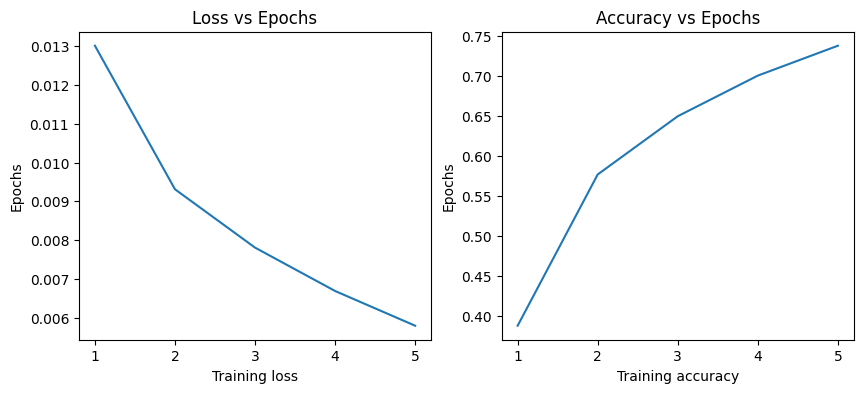

In [41]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(train_losses)+1),train_losses)
plt.xlabel('Training loss')
plt.ylabel('Epochs')
ax.set_title('Loss vs Epochs')
ax = fig.add_subplot(1,2, 2)
ax.plot(np.arange(1,len(train_acc)+1),train_acc)
plt.xlabel('Training accuracy')
plt.ylabel('Epochs')
ax.set_title('Accuracy vs Epochs')
plt.show()

In [42]:
# Accuracy on test data after training
test_model(model, testloader)

Accuracy of the network: 68 %


## Questions
1) List some reasons why we should prefer CNN over ANN for image classification?

2) Try improving the CNN performance further by tuning the hyperparameters(epochs, optimizer, LR etc). Report the improved test accuracy.

3) What happens if you reduce the number of convolution layers to only 1?

4) Why didn't we use the Softmax activation in the last layer of CNN?

#**ANSWERS**

#**1) QUESTION ANSWER**



When it comes to image classification, Convolutional Neural Networks (CNNs) are generally preferred over traditional Artificial Neural Networks (ANNs) for several reasons:

* **Spatial Hierarchy**:
   - CNNs utilize convolutional layers that are designed to detect local patterns, such as edges, textures, and shapes, which are crucial for understanding images. These layers create a spatial hierarchy of features, making CNNs particularly well-suited for image data.

* **Parameter Sharing**:
   - Convolutional layers share weights across different positions in the image, which significantly reduces the number of parameters compared to fully connected layers in ANNs. This makes CNNs more efficient in terms of memory and computational requirements.

* **Translation Invariance**:
   - CNNs are inherently translation invariant due to their convolutional operations. This means they can recognize objects regardless of their position in the image, enhancing their robustness and generalization capabilities.

* **Local Receptive Fields**:
   - CNNs process data within local receptive fields, allowing them to focus on small regions of the image at a time. This local approach enables CNNs to effectively capture and learn local features before combining them into more complex global patterns.

* **Depth and Hierarchical Learning**:
   - CNNs can have many layers (depth), which enables them to learn and represent complex patterns and hierarchical features. Early layers might detect simple features like edges, while deeper layers can recognize more abstract concepts like faces or objects.

* **Reduction in Overfitting**:
   - Due to their architectural design and the reduced number of parameters, CNNs are less prone to overfitting compared to fully connected ANNs, especially when dealing with large and complex datasets like images.

* **Pre-trained Models and Transfer Learning**:
   - There are many pre-trained CNN models available (e.g., VGG, ResNet, Inception) that have been trained on large datasets like ImageNet. These models can be fine-tuned for specific tasks, providing a significant head start and improving performance on new image classification tasks.

* **Advanced Techniques**:
   - CNNs easily integrate with advanced techniques such as data augmentation, batch normalization, and dropout, which can further enhance their performance and robustness in image classification tasks.

These reasons collectively make CNNs the go-to choice for image classification tasks, providing superior accuracy, efficiency, and robustness compared to traditional ANNs.

Epoch 1/10
1563/1563 [==============================] - 82s 52ms/step - loss: 1.5360 - accuracy: 0.4376 - val_loss: 1.2623 - val_accuracy: 0.5414
Epoch 2/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1714 - accuracy: 0.5869 - val_loss: 1.1029 - val_accuracy: 0.6109
Epoch 3/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.0306 - accuracy: 0.6381 - val_loss: 0.9770 - val_accuracy: 0.6612
Epoch 4/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9338 - accuracy: 0.6718 - val_loss: 0.9594 - val_accuracy: 0.6594
Epoch 5/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8711 - accuracy: 0.6964 - val_loss: 0.8863 - val_accuracy: 0.6900
Epoch 6/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8125 - accuracy: 0.7136 - val_loss: 0.9175 - val_accuracy: 0.6881
Epoch 7/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7692 - accuracy: 0.7325 - val_loss: 0.8921 -

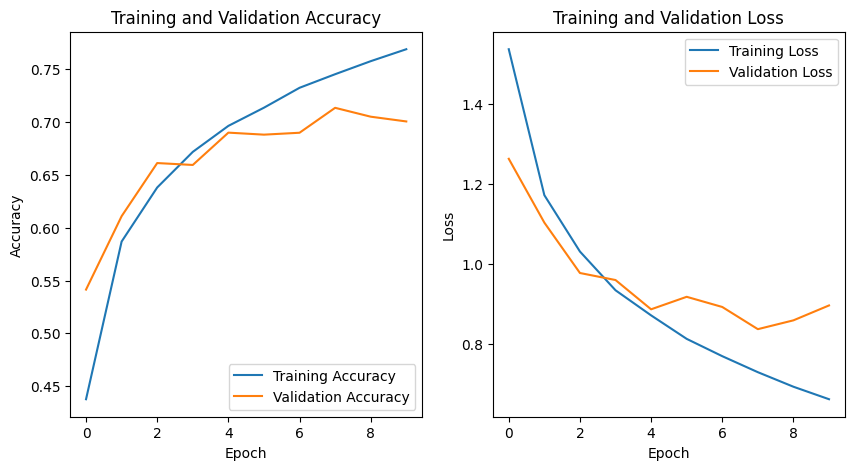

In [43]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Plot training & validation accuracy and loss
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

#**2) QUESTION ANSWER**

In [44]:
model = Net()

# Cross Entropy loss for multi-class classification
criterion = nn.CrossEntropyLoss()

# SGD optimizer with momentum
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

num_epochs = 10  # iterations
train_losses, train_acc = train(num_epochs, model, trainloader, criterion, optimizer)

# Accuracy on test data after training
test_model(model, testloader)

Epoch 1/10, Loss: 0.0153, Accuracy: 28.0580
Epoch 2/10, Loss: 0.0114, Accuracy: 47.5100
Epoch 3/10, Loss: 0.0098, Accuracy: 55.3360
Epoch 4/10, Loss: 0.0087, Accuracy: 60.4180
Epoch 5/10, Loss: 0.0078, Accuracy: 65.1260
Epoch 6/10, Loss: 0.0070, Accuracy: 68.7300
Epoch 7/10, Loss: 0.0063, Accuracy: 71.9320
Epoch 8/10, Loss: 0.0056, Accuracy: 74.7620
Epoch 9/10, Loss: 0.0050, Accuracy: 77.6220
Epoch 10/10, Loss: 0.0044, Accuracy: 80.3780
Accuracy of the network: 70 %


#**3) QUESTION ANSWER**


### Impact of Reducing Convolutional Layers to One

Reducing the number of convolutional layers in a CNN to only one significantly impacts the model's performance and its ability to effectively process and classify images. Here’s a detailed explanation:

* **Limited Feature Extraction**:
   - **Definition**: Convolutional layers are responsible for detecting patterns such as edges, textures, and more complex structures. With only one convolutional layer, the model can only capture very basic patterns and low-level features, missing out on the hierarchical and abstract features necessary for accurate classification.

* **Reduced Hierarchical Learning**:
   - **Definition**: CNNs learn in a hierarchical manner where early layers capture simple features and deeper layers capture complex features. A single convolutional layer restricts the model's ability to build on these features, leading to a less nuanced understanding of the image content.

* **Lower Accuracy**:
   - **Definition**: With the reduced capacity to extract and learn from features, the model's accuracy on test data is likely to be significantly lower compared to models with multiple convolutional layers. This is because the model fails to capture the necessary details required for distinguishing between different classes accurately.

* **Overfitting Risk**:
   - **Definition**: A shallow model might overfit the training data quickly because it doesn't generalize well to unseen data. The limited learning capacity of a single convolutional layer means the model might memorize the training data rather than learning robust features applicable to new images.

* **Efficiency vs. Effectiveness**:
   - **Definition**: While reducing the number of layers can make the model more computationally efficient and faster to train, this comes at the cost of effectiveness. The trade-off results in a model that runs faster but performs poorly in terms of classification accuracy.

### Conclusion

Using only one convolutional layer in a CNN drastically diminishes its ability to perform well in image classification tasks. The model's limited ability to extract and understand complex features from images results in lower accuracy and poorer generalization to new data.

In [45]:



# CNN with 1 CONV layers and 3 FC layers
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(3600, 512)
        self.fc2 = nn.Linear(512, 128)
        # output layer 10 classes
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        # flatten all dimensions except batch
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


#**4) QUESTION ANSWER**



We didn't use the softmax activation in the last layer of CNN due to the fact that we used the Cross Entropy loss as criterion, which implicitlyuses softmax.